This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

In [2]:
#importing Libraries
import pandas as pd
import datetime as dt

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [3]:
df = pd.read_csv('data/data_000637.txt') 
size= df.shape
Rows=size[0]
N=12000
# print(N)
# print(size)

rows=df.head(100)
Range=df.iloc[10001:Rows]
Range

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
10001,1,0,47,3869200267,785,14
10002,1,0,63,3869200267,921,28
10003,1,0,64,3869200267,924,15
10004,1,0,7,3869200267,998,22
10005,1,0,8,3869200267,998,12
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [4]:
max_bx = max(df.BX_COUNTER)
max_bx = max_bx+1
print("The maximum value of BX-Counter is = ", max_bx)

The maximum value of BX-Counter is =  3564


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [5]:
first_row = df.iloc[0]
print(first_row)

nano_sec_init = first_row['ORBIT_CNT'] * max_bx * 25 + first_row['BX_COUNTER'] * 25 + first_row['TDC_MEAS'] * 25/30
# print(nano_sec_init)
sec_init = nano_sec_init *10**-9

print(str(dt.timedelta(seconds=sec_init)))


HEAD                    1
FPGA                    0
TDC_CHANNEL           123
ORBIT_CNT      3869200167
BX_COUNTER           2374
TDC_MEAS               26
Name: 0, dtype: int64
3 days, 23:45:45.734939


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [6]:
df['abs_NS'] = (df['ORBIT_CNT'] * max_bx * 25 + df['BX_COUNTER'] * 25 + df['TDC_MEAS'] * 25/30)- nano_sec_init
df



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_NS
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
3,1,0,64,3869200167,2558,19,4.594125e+03
4,1,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310716,1,1,4,3869211171,763,11,9.804161e+08
1310717,1,0,64,3869211171,764,0,9.804161e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [7]:
noisy_grp = df.groupby('TDC_CHANNEL').sum()
noisy_grp

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_NS
TDC_CHANNEL,,,,,,
1,29653,28438,114733571761779,52999263,430533,1.596715e+13
2,34271,32669,132601566229845,61017792,499099,1.847051e+13
3,23463,21970,90783184937635,41678301,340104,1.260011e+13
4,28755,26403,111259024921199,51473537,416945,1.551359e+13
5,16435,15003,63590404218625,29099531,238778,8.862884e+12
...,...,...,...,...,...,...
129,37,35,143160633554,67804,612,2.025861e+10
130,71,38,274713643273,124418,993,3.843806e+10
137,68,36,263106045511,123920,748,3.868227e+10


In [8]:
sort = noisy_grp.sort_values(by=['HEAD'],ascending=False)
# display(sort)

disp_3 = sort.iloc[:3]
display(disp_3)

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_NS
TDC_CHANNEL,,,,,,
139,108059,32442,418102549486957,192477704,0,5.779232e+13
64,66020,1439,255444994368975,117767051,962195,3.558054e+13
63,64642,918,250113227630194,115482430,938192,3.478681e+13


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [9]:
non_empty = df.groupby('ORBIT_CNT').size().reset_index(name='counts')
l=len(non_empty)
print("Non-Empty Orbit ",l,"\n",non_empty)



unique_orb = df[df['TDC_CHANNEL']==139].groupby('ORBIT_CNT').size().reset_index(name='counts')
ul=len(unique_orb)
print("Unique values",ul,"\n",unique_orb)


Non-Empty Orbit  11001 
         ORBIT_CNT  counts
0      3869200167      43
1      3869200168      85
2      3869200169     127
3      3869200170      98
4      3869200171     109
...           ...     ...
10996  3869211167     208
10997  3869211168     109
10998  3869211169     191
10999  3869211170     137
11000  3869211171      22

[11001 rows x 2 columns]
Unique values 10976 
         ORBIT_CNT  counts
0      3869200167       4
1      3869200168       8
2      3869200169      11
3      3869200170       9
4      3869200171       9
...           ...     ...
10971  3869211167      19
10972  3869211168       8
10973  3869211169      13
10974  3869211170      12
10975  3869211171       2

[10976 rows x 2 columns]


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

<AxesSubplot:title={'center':'FPGA 1'}, xlabel='TDC_CHANNEL'>

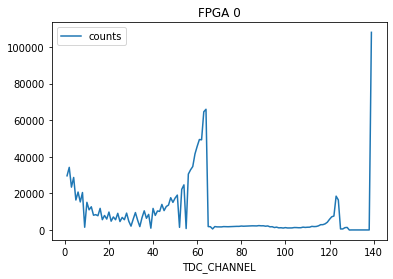

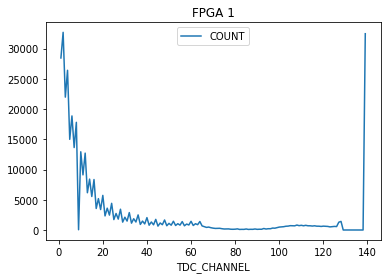

In [10]:
tdc_0 = df.groupby('TDC_CHANNEL').size().reset_index(name='counts')
tdc_0.plot(x='TDC_CHANNEL',y='counts',title='FPGA 0')



tdc_1 = df[df['FPGA']== 1].groupby('TDC_CHANNEL').size().reset_index(name='COUNT')
tdc_1.plot(x = 'TDC_CHANNEL', y = 'COUNT', title = "FPGA 1")